<a href="https://colab.research.google.com/github/Rezvan1344/ACIT-4070/blob/main/MNIST_concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [ ]:
import pandas as pd
import io
df1 = pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mnist_test.csv to mnist_test.csv


In [ ]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['mnist_test.csv']))

In [ ]:
 dataset = pd.concat([df1,df2])

In [ ]:
X = dataset.drop(columns='label', axis= 1)


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset['label']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 3)

In [ ]:
print ( X.shape, X_train.shape, X_test.shape)

(70000, 784) (56000, 784) (14000, 784)


In [ ]:
model=LogisticRegression(solver='newton-cg')


In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter = 1000), X, Y, cv=5)



In [ ]:
print (cv_score_lr)

[0.913      0.91521429 0.90542857 0.91128571 0.92421429]


In [ ]:

print (cv_score_lr)
mean_accuracy_lr = sum (cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print(mean_accuracy_lr)

[0.913      0.91521429 0.90542857 0.91128571 0.92421429]
91.38


The accuracy of the model is the average of the accuracy of each fold. 
Accuracy of the model is 91.38

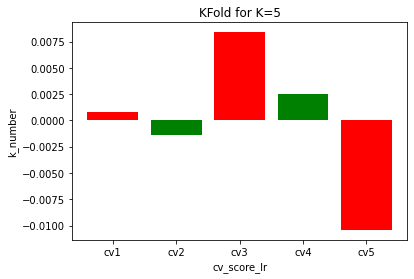

In [ ]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars

left = [1, 2, 3, 4, 5]
# heights of bars

height = [0.913, 0.91521429, 0.90542857, 0.91128571, 0.92421429]
difference = [0.9138-0.913, 0.9138-0.91521429, 0.9138-0.90542857, 0.9138- 0.91128571, 0.9138-0.92421429]
# labels for bars
tick_label = ['cv1', 'cv2', 'cv3', 'cv4', 'cv5']

# plotting a bar chart
#plt.bar(left, height, tick_label = tick_label,
		#width = 0.8, color = ['red', 'green'])
plt.bar(left, difference, tick_label= tick_label, width =0.8, color=['red', 'green'])

# naming the x-axis
plt.xlabel('cv_score_lr')
# naming the y-axis
plt.ylabel('k_number')
# plot title
plt.title('KFold for K=5')

# function to show the plot
plt.show()
